In [88]:
import geopandas as gpd
from longsgis import voronoiDiagram4plg
import matplotlib.pyplot as plt
import pedpy
import pathlib
import pandas as pd
from shapely import Polygon

In [89]:
def plot_polygon(polygon, ax, facecolor="blue", alpha=0.5):
    """plots a polygon with its interior in matplotlib"""
    poly = gpd.GeoSeries([polygon])
    poly.plot(ax=ax, edgecolor="Black", facecolor=facecolor, alpha=alpha)

In [90]:
traj = pedpy.load_trajectory(
    trajectory_file=pathlib.Path("040_c_56_h-.txt")
)
bounds =  Polygon(
    # complete area
    [
        (3.5, -2),
        (3.5, 8),
        (-3.5, 8),
        (-3.5, -2),
    ],
    holes=[
        # left barrier
        [
            (-0.7, -1.1),
            (-0.25, -1.1),
            (-0.25, -0.15),
            (-0.4, 0.0),
            (-2.8, 0.0),
            (-2.8, 6.7),
            (-3.05, 6.7),
            (-3.05, -0.3),
            (-0.7, -0.3),
            (-0.7, -1.0),
        ],
        # right barrier
        [
            (0.25, -1.1),
            (0.7, -1.1),
            (0.7, -0.3),
            (3.05, -0.3),
            (3.05, 6.7),
            (2.8, 6.7),
            (2.8, 0.0),
            (0.4, 0.0),
            (0.25, -0.15),
            (0.25, -1.1),
        ],
    ],
)

/tmp/ipykernel_5483/4108997632.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame["min_dist"] = data_frame.apply(lambda row: min_distance_bounds(row['point'], bounds=obstacles), axis=1)
/tmp/ipykernel_5483/4108997632.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame['geometry'] = data_frame.apply(lambda row: create_circle_dynamic(row['point'], radius, row['min_dist']/2), axis=1)
/tmp/ipykernel_5483/4108997632.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of

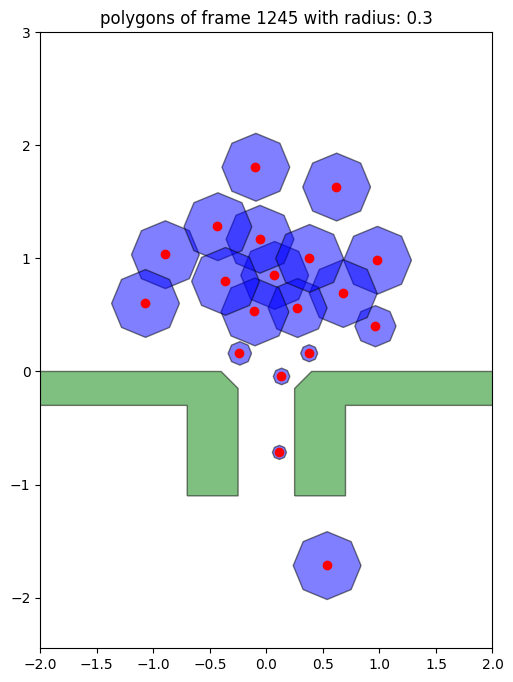

In [91]:
frame = 1245
radius = 0.3
h1 = Polygon([(-0.7, -1.1),(-0.25, -1.1),(-0.25, -0.15),(-0.4, 0.0),(-2.8, 0.0),(-2.8, 6.7),(-3.05, 6.7),(-3.05, -0.3),(-0.7, -0.3),(-0.7, -1.0)])
h2 = Polygon([(0.25, -1.1), (0.7, -1.1),(0.7, -0.3),(3.05, -0.3),(3.05, 6.7),(2.8, 6.7),(2.8, 0.0),(0.4, 0.0),(0.25, -0.15),(0.25, -1.1)])
obstacles = h1.union(h2)
data_frame = traj.data[traj.data["frame"] == frame]

def min_distance(point, other_points, bounds):
    distances = [point.distance(other) for other in other_points]
    distances.append(point.distance(bounds))
    return min(distances)

def min_distance_bounds(point, bounds):
    return point.distance(bounds)

def create_circle_dynamic(point, radius, min_dist):
    """creates a circle around the point with radius size radius if min_distance to others is >= radius else chooses size min_dist"""
    dynam_radis = min_dist*0.9 if min_dist < radius else radius
    return Polygon(point.buffer(dynam_radis, quad_segs=2).exterior.coords)

data_frame["min_dist"] = data_frame.apply(lambda row: min_distance_bounds(row['point'], bounds=obstacles), axis=1)
data_frame['geometry'] = data_frame.apply(lambda row: create_circle_dynamic(row['point'], radius, row['min_dist']/2), axis=1)
data_frame['area'] = data_frame['geometry'].apply(lambda x: x.area)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
plot_polygon(polygon=obstacles,ax=ax, facecolor="green")
for poly in data_frame['geometry']:
    plot_polygon(poly, ax)
#for poly in data_frame['geometry_min']:
#    plot_polygon(poly, ax, facecolor="orange")

ax.scatter(data_frame['x'], data_frame['y'], c='red')
plt.title(f"polygons of frame {frame} with radius: {radius}")
plt.xlim(-2, 2)
plt.ylim(None, 3)
plt.show()

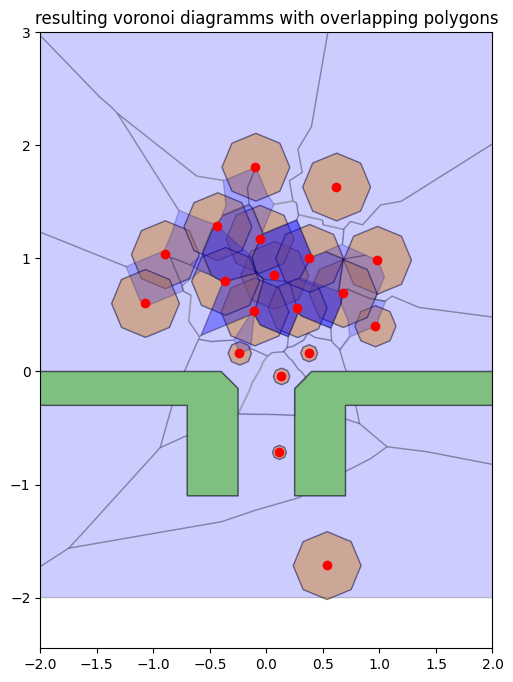

In [92]:
used_data_frame = gpd.GeoDataFrame(data_frame[["area", "geometry"]])
try:
    vd = voronoiDiagram4plg(used_data_frame, bounds)
    
except Exception as e:
    print(f"frame {frame} did not work properly")
    raise e
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
plot_polygon(polygon=obstacles,ax=ax, facecolor="green")
for poly in data_frame['geometry']:
    plot_polygon(poly, ax, facecolor="orange")
for poly in vd['geometry']:
    plot_polygon(poly, ax, alpha=0.2)

ax.scatter(data_frame['x'], data_frame['y'], c='red')
plt.title("resulting voronoi diagramms with overlapping polygons")
plt.xlim(-2, 2)
plt.ylim(None, 3)
#plt.savefig("voronoi_dynamic_wall.png", bbox_inches='tight')
plt.show()

/tmp/ipykernel_5483/3519930549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame["min_dist"] = data_frame.apply(lambda row: min_distance(row['point'], data_frame['point'].drop(row.name), bounds=obstacles), axis=1)
/tmp/ipykernel_5483/3519930549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame['geometry'] = data_frame.apply(lambda row: create_circle_dynamic(row['point'], radius, row['min_dist']/2), axis=1)
/tmp/ipykernel_5483/3519930549.py:3: SettingWithCopyWarning: 
A value is try

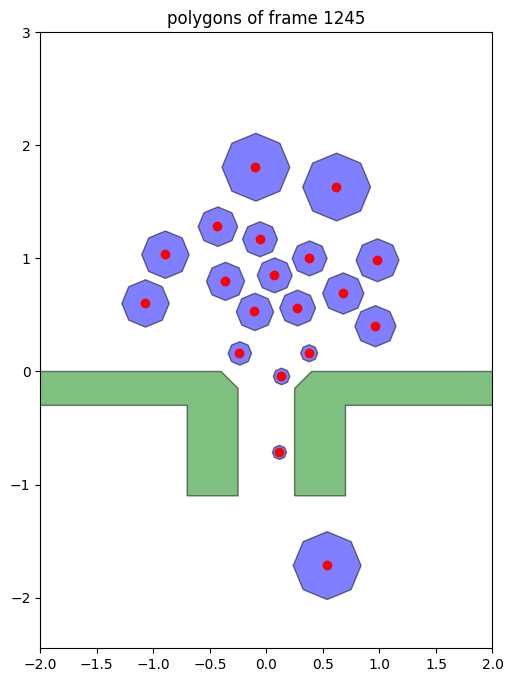

In [93]:
data_frame["min_dist"] = data_frame.apply(lambda row: min_distance(row['point'], data_frame['point'].drop(row.name), bounds=obstacles), axis=1)
data_frame['geometry'] = data_frame.apply(lambda row: create_circle_dynamic(row['point'], radius, row['min_dist']/2), axis=1)
data_frame['area'] = data_frame['geometry'].apply(lambda x: x.area)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
plot_polygon(polygon=obstacles,ax=ax, facecolor="green")
for poly in data_frame['geometry']:
    plot_polygon(poly, ax)
#for poly in data_frame['geometry_min']:
#    plot_polygon(poly, ax, facecolor="orange")

ax.scatter(data_frame['x'], data_frame['y'], c='red')
plt.title(f"polygons of frame {frame}")
plt.xlim(-2, 2)
plt.ylim(None, 3)
#plt.savefig("polygons_overlap.png", bbox_inches='tight')
plt.show()

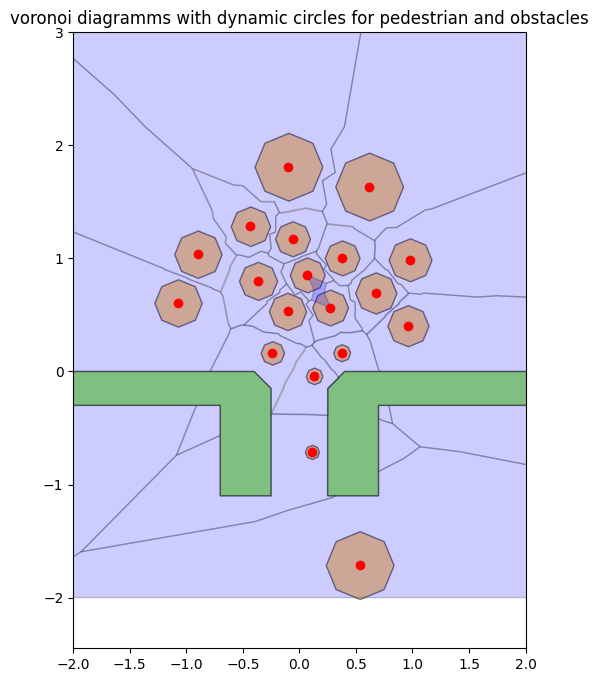

In [97]:
used_data_frame = gpd.GeoDataFrame(data_frame[["area", "geometry"]])
try:
    vd = voronoiDiagram4plg(used_data_frame, bounds)
    
except Exception as e:
    print(f"frame {frame} did not work properly")
    raise e
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
plot_polygon(polygon=obstacles,ax=ax, facecolor="green")
for poly in data_frame['geometry']:
    plot_polygon(poly, ax, facecolor="orange")
i = 0
for poly in vd['geometry']:
    plot_polygon(poly, ax, alpha=0.2)
    i+=1

ax.scatter(data_frame['x'], data_frame['y'], c='red')
plt.title("voronoi diagramms with dynamic circles for pedestrian and obstacles")
plt.xlim(-2, 2)
plt.ylim(None, 3)
#plt.savefig("voronoi_dynamic_ped.png", bbox_inches='tight')
plt.show()

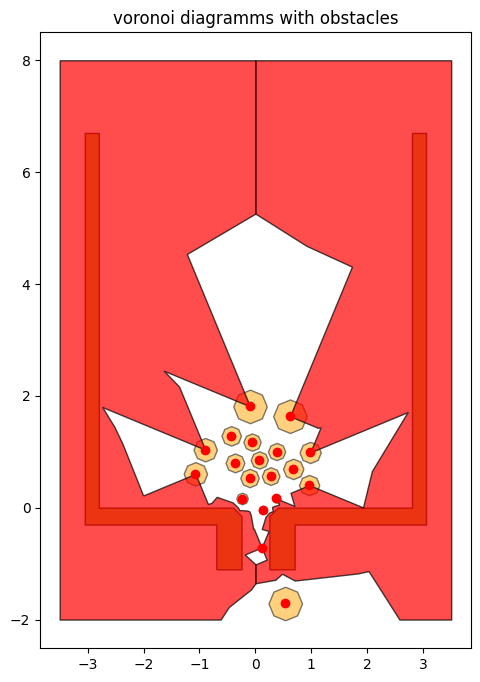

In [103]:
used_data_frame = data_frame[["area", "geometry"]]
complete_area =  Polygon([(3.5, -2),(3.5, 8),(-3.5, 8),(-3.5, -2)])
additional_obstacles = pd.DataFrame({"geometry": [h1, h2], "area": [h1.area, h2.area]})

used_data_frame = pd.concat([additional_obstacles, used_data_frame])
used_data_frame = gpd.GeoDataFrame(used_data_frame)
try:
    vd = voronoiDiagram4plg(used_data_frame, complete_area)
    
except Exception as e:
    print(f"frame {frame} did not work properly")
    raise e

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
plot_polygon(polygon=h1,ax=ax, facecolor="green")
plot_polygon(polygon=h2,ax=ax, facecolor="green")
for poly in used_data_frame['geometry']:
    plot_polygon(poly, ax, facecolor="orange")
i = 0
for poly in vd['geometry']:
    if i in [9, 19]:
        plot_polygon(poly, ax, alpha=0.7, facecolor="red")
        i+=1
    #plot_polygon(poly, ax, alpha=0.5)
    i+=1

ax.scatter(data_frame['x'], data_frame['y'], c='red')
plt.title("voronoi diagramms with obstacles")
#plt.savefig("voronoi_with_obstacles.png", bbox_inches='tight')
plt.show()